In [1]:
#Import dependencies
import pandas as pd
import matplotlib as plt
import numpy as np

#Import and read CSV's
summer_olympics = pd.read_csv("Homar's Data/summer.csv")
winter_olympics = pd.read_csv("Homar's Data/winter.csv")
dictionary_data = pd.read_csv("Homar's Data/dictionary.csv", usecols=['Code', 'Country'])

#Convert into DF
summer_df = pd.DataFrame(summer_olympics)
winter_df = pd.DataFrame(winter_olympics)


In [2]:
#Country Mapping
country_mapping = dict(zip(dictionary_data['Code'], dictionary_data['Country']))

known_country_names =  {
    'URS': 'USSR-Prior 1992', 'TCH': 'Czechoslovakia- Prior 1992','ROU': 'Romania','GDR': 'East Germany-Prior 1992','EUN': 'Europe Unified Team',
    'FRG': 'Germany- Prior 1990','EUA': 'Austria- pre AUT','ZZX': 'Unknown','ANZ': 'Australia-New Zealand','BOH': 'Bohemia','RU1': 'Russia',
    'YUG': 'Yugoslavia',}

summer_df['Country Name'] = summer_df['Country'].map(country_mapping)
for index, row in summer_df.iterrows():
    country_code = row['Country']
    if pd.isna(row['Country Name']):
        if country_code in country_mapping:
            summer_df.at[index, 'Country Name'] = country_mapping[country_code]
        elif country_code in known_country_names:
            summer_df.at[index, 'Country Name'] = known_country_names[country_code]

winter_df['Country Name'] = winter_df['Country'].map(country_mapping)
for index, row in winter_df.iterrows():
    country_code = row['Country']
    if pd.isna(row['Country Name']):
        if country_code in country_mapping:
            winter_df.at[index, 'Country Name'] = country_mapping[country_code]
        elif country_code in known_country_names:
            winter_df.at[index, 'Country Name'] = known_country_names[country_code]

In [3]:
#Clean up Summer Olympic's DataFrame
summer_df = summer_df.drop(['City', 'Sport', 'Discipline', 'Gender', 'Athlete', 'Event', 'Country'], axis = 1)
clean_summer_df = summer_df.loc[summer_df['Year'] > 1945]
clean_summer_df = clean_summer_df[['Year', 'Country Name', 'Medal']]

#Clean up Winter Olympic's DataFrame
winter_df = winter_df.drop(['City', 'Sport', 'Discipline', 'Gender', 'Athlete', 'Event', 'Country'], axis = 1)
clean_winter_df = winter_df.loc[winter_df['Year'] > 1945]
clean_winter_df = clean_winter_df[['Year', 'Country Name', 'Medal']]

In [4]:
#Find the specific year that I want to grab the top 3 countries for
summer_1948 = clean_summer_df.loc[clean_summer_df['Year'] == 1948]
summer_1980 = clean_summer_df.loc[clean_summer_df['Year'] == 1980].sort_values(by=['Country Name'])
summer_2012 = clean_summer_df.loc[clean_summer_df['Year'] == 2012].sort_values(by=['Country Name'])
winter_1948 = clean_winter_df.loc[clean_winter_df['Year'] == 1948].sort_values(by=['Country Name'])
winter_1980 = clean_winter_df.loc[clean_winter_df['Year'] == 1980].sort_values(by=['Country Name'])
winter_2010 = clean_winter_df.loc[clean_winter_df['Year'] == 2010].sort_values(by=['Country Name'])

In [5]:
#Summer 1948
bronze_count = 0
silver_count = 0                   
gold_count = 0
medals_count = (bronze_count + silver_count + gold_count)
dict_1948 = {}
for i,r in summer_1948.iterrows():

    if r['Country Name'] not in dict_1948: 
        bronze_count = 0
        silver_count = 0                   
        gold_count = 0
        dict_1948[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count
    
            
    if r['Medal'] == 'Bronze':
        bronze_count += 1
    if r['Medal'] == 'Silver':
        silver_count += 1
    if r['Medal'] == 'Gold':
        gold_count += 1

    if r['Country Name'] in dict_1948:
        medals_count = (bronze_count + silver_count + gold_count)
        dict_1948[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count

df_summer1948 = pd.DataFrame.from_dict(dict_1948, orient='index')
df_summer1948.rename(columns= {0 : 'Bronze', 1 :'Silver', 2:'Gold', 3: 'Total'}, inplace= True)
df_summer1948 = df_summer1948.nlargest(3,['Gold','Silver','Bronze', 'Total'])
index = df_summer1948.index
index.name = "Summer 1948"



In [6]:
#Summer 1980
bronze_count = 0
silver_count = 0                   
gold_count = 0
medals_count = (bronze_count + silver_count + gold_count)
dict_1980 = {}
for i,r in summer_1980.iterrows():

    if r['Country Name'] not in dict_1980: 
        bronze_count = 0
        silver_count = 0                   
        gold_count = 0
        dict_1980[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count
    
            
    if r['Medal'] == 'Bronze':
        bronze_count += 1
    if r['Medal'] == 'Silver':
        silver_count += 1
    if r['Medal'] == 'Gold':
        gold_count += 1

    if r['Country Name'] in dict_1980:
        medals_count = (bronze_count + silver_count + gold_count)
        dict_1980[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count

df_summer1980 = pd.DataFrame.from_dict(dict_1980, orient='index')
df_summer1980.rename(columns= {0 : 'Bronze', 1 :'Silver', 2:'Gold', 3: 'Total'}, inplace= True)
df_summer1980 = df_summer1980.nlargest(3,['Gold','Silver','Bronze', 'Total'])
index = df_summer1980.index
index.name = "Summer 1980"


In [7]:
#Summer 2012
bronze_count = 0
silver_count = 0                   
gold_count = 0
medals_count = (bronze_count + silver_count + gold_count)
dict_2012 = {}
for i,r in summer_2012.iterrows():

    if r['Country Name'] not in dict_2012: 
        bronze_count = 0
        silver_count = 0                   
        gold_count = 0
        dict_2012[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count
    
            
    if r['Medal'] == 'Bronze':
        bronze_count += 1
    if r['Medal'] == 'Silver':
        silver_count += 1
    if r['Medal'] == 'Gold':
        gold_count += 1

    if r['Country Name'] in dict_2012:
        medals_count = (bronze_count + silver_count + gold_count)
        dict_2012[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count

df_summer2012 = pd.DataFrame.from_dict(dict_2012, orient='index')
df_summer2012.rename(columns= {0 : 'Bronze', 1 :'Silver', 2:'Gold', 3: 'Total'}, inplace= True)
df_summer2012 = df_summer2012.nlargest(3,['Gold','Silver','Bronze', 'Total'])
index = df_summer2012.index
index.name = "Summer 2012"

In [8]:
#Winter 1948
bronze_count = 0
silver_count = 0                   
gold_count = 0
medals_count = (bronze_count + silver_count + gold_count)
dict_w1948 = {}
for i,r in winter_1948.iterrows():

    if r['Country Name'] not in dict_w1948: 
        bronze_count = 0
        silver_count = 0                   
        gold_count = 0
        dict_w1948[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count
    
            
    if r['Medal'] == 'Bronze':
        bronze_count += 1
    if r['Medal'] == 'Silver':
        silver_count += 1
    if r['Medal'] == 'Gold':
        gold_count += 1

    if r['Country Name'] in dict_w1948:
        medals_count = (bronze_count + silver_count + gold_count)
        dict_w1948[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count

df_winter1948 = pd.DataFrame.from_dict(dict_w1948, orient='index')
df_winter1948.rename(columns= {0 : 'Bronze', 1 :'Silver', 2:'Gold', 3: 'Total'}, inplace= True)
df_winter1948 = df_winter1948.nlargest(3,['Gold','Silver','Bronze', 'Total'])
index = df_winter1948.index
index.name = "Winter 1948"

In [9]:
#Winter 1980
bronze_count = 0
silver_count = 0                   
gold_count = 0
medals_count = (bronze_count + silver_count + gold_count)
dict_w1980 = {}
for i,r in winter_1980.iterrows():

    if r['Country Name'] not in dict_w1980: 
        bronze_count = 0
        silver_count = 0                   
        gold_count = 0
        dict_w1980[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count
    
            
    if r['Medal'] == 'Bronze':
        bronze_count += 1
    if r['Medal'] == 'Silver':
        silver_count += 1
    if r['Medal'] == 'Gold':
        gold_count += 1

    if r['Country Name'] in dict_w1980:
        medals_count = (bronze_count + silver_count + gold_count)
        dict_w1980[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count

df_winter1980 = pd.DataFrame.from_dict(dict_w1980, orient='index')
df_winter1980.rename(columns= {0 : 'Bronze', 1 :'Silver', 2:'Gold', 3: 'Total'}, inplace= True)
df_winter1980 = df_winter1980.nlargest(3,['Gold','Silver','Bronze', 'Total'])
index = df_winter1980.index
index.name = "Winter 1980"

In [10]:
#Winter 2010
bronze_count = 0
silver_count = 0                   
gold_count = 0
medals_count = (bronze_count + silver_count + gold_count)
dict_w2010 = {}
for i,r in winter_2010.iterrows():

    if r['Country Name'] not in dict_w2010: 
        bronze_count = 0
        silver_count = 0                   
        gold_count = 0
        dict_w2010[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count
    
            
    if r['Medal'] == 'Bronze':
        bronze_count += 1
    if r['Medal'] == 'Silver':
        silver_count += 1
    if r['Medal'] == 'Gold':
        gold_count += 1

    if r['Country Name'] in dict_w2010:
        medals_count = (bronze_count + silver_count + gold_count)
        dict_w2010[r['Country Name']] = bronze_count, silver_count, gold_count, medals_count

df_winter2010 = pd.DataFrame.from_dict(dict_w2010, orient='index')
df_winter2010.rename(columns= {0 : 'Bronze', 1 :'Silver', 2:'Gold', 3: 'Total'}, inplace= True)
df_winter2010 = df_winter2010.nlargest(3,['Gold','Silver','Bronze', 'Total'])
index = df_winter2010.index
index.name = "Winter 2010"

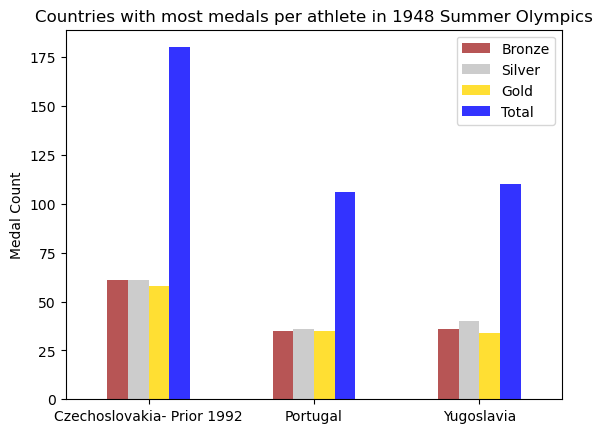

In [11]:
#Summer 1948 Top 3
plot_1 = df_summer1948.plot(kind = 'bar', title = 'Countries with most medals per athlete in 1948 Summer Olympics', xlabel = '', 
                            ylabel = 'Medal Count', color = ['Brown', 'Silver', 'Gold', 'Blue'], alpha = 0.80, rot = 0)

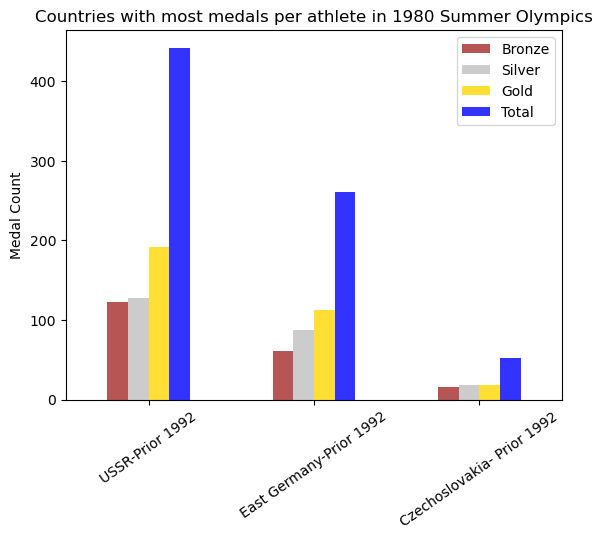

In [12]:
#Summer 1980 Top 3
plot_2 = df_summer1980.plot(kind = 'bar', title = 'Countries with most medals per athlete in 1980 Summer Olympics', xlabel = '', 
                            ylabel = 'Medal Count', color = ['Brown', 'Silver', 'Gold', 'Blue'], alpha = 0.80, rot = 35)
#plt.savefig("Homar's Data/1980 Summer.png")


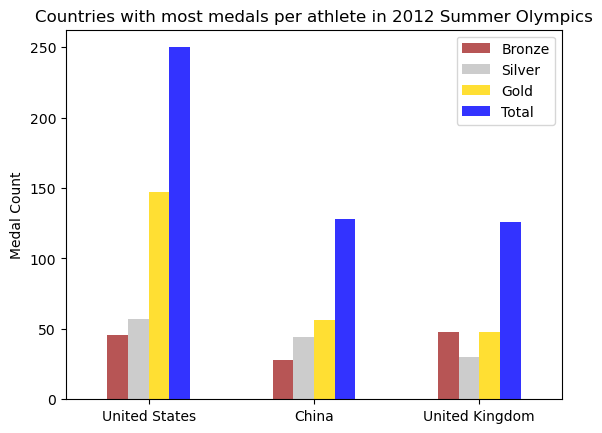

In [13]:
#Summer 2012 Top 3
plot_2012 = df_summer2012.plot(kind = 'bar', title = 'Countries with most medals per athlete in 2012 Summer Olympics', xlabel = '', 
                            ylabel = 'Medal Count', color = ['Brown', 'Silver', 'Gold', 'Blue'], alpha = 0.80, rot = 0)

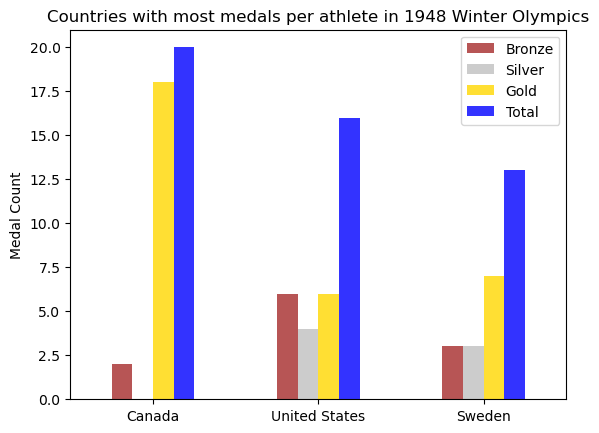

In [14]:
#Winter 1948 Top 3 
sorted_winter1948 = df_winter1948.sort_values(by = 'Total', ascending=False)
plot_4 = sorted_winter1948.plot(kind = 'bar', title = 'Countries with most medals per athlete in 1948 Winter Olympics', xlabel = '', 
                            ylabel = 'Medal Count', color = ['Brown', 'Silver', 'Gold', 'Blue'], alpha = 0.80, rot = 0)

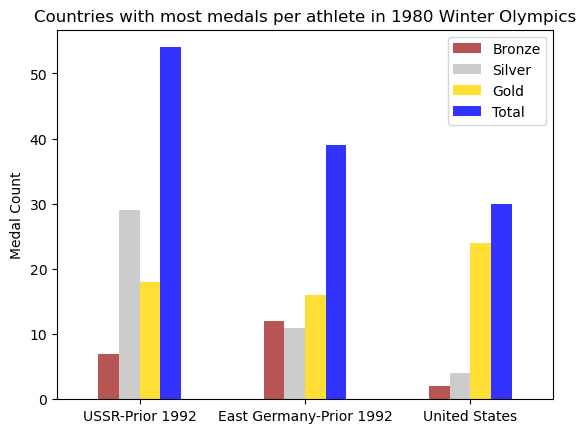

In [15]:
sorted_winter1980 = df_winter1980.sort_values(by = 'Total', ascending=False)
plot_5 = sorted_winter1980.plot(kind = 'bar', title = 'Countries with most medals per athlete in 1980 Winter Olympics', xlabel = '', 
                            ylabel = 'Medal Count', color = ['Brown', 'Silver', 'Gold', 'Blue'], alpha = 0.80, rot = 0)

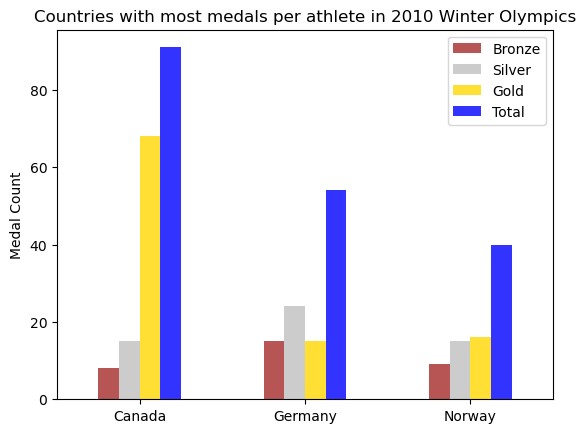

In [16]:
sorted_winter_2010 = df_winter2010.sort_values(by = 'Total', ascending=False)
plot_6 = sorted_winter_2010.plot(kind = 'bar', title = 'Countries with most medals per athlete in 2010 Winter Olympics', xlabel = '', 
                            ylabel = 'Medal Count', color = ['Brown', 'Silver', 'Gold', 'Blue'], alpha = 0.80, rot = 0)